# Cross Validation

## 1. Introduction

<p style="line-height:1.75;font-size:16px">
In the previous chapters we learned that it is common practice to split the our data into <b>train</b> and <b>test</b> when building a machine learning model. The train data is used to train the model (i.e. learn the parameter values) while the test data is used to validate the results of our final model. If the model performed well on the training data but poorly on the test data we could say that the model suffers from <b>overfitting</b> and that it's probably not a very useful model.<br>
While splitting the data into train and test seems like a good solution, it does have some drawbacks:<br>
<span style="line-height:1.75;font-size:16px">1. If we have limited data, we might introduce bias into the model by not using all of the data for training.<br>
<span style="line-height:1.75;font-size:16px">2. Training the model again according to the results on the test set leads to <b>data leakage</b>.<bR>
Cross validation addresses these issues by repeating the training and testing process on different splits of the data and reporting the results for each split.

<div style="line-height:1.75;background:#f6e609;padding-left:20px;padding-top:5px;padding-bottom:5px;border-radius:5px 5px 0px 0px">
<i class="fa fa-lightbulb-o" style="font-size: 50px;color:#ffffcc;"></i>
</div>
<div>
<p style="line-height:1.75;font-size:16px;background:#ffffcc;padding:20px;border-radius:0px 0px 5px 5px">
<span style="font-size:16px"><b>Data Leakage</b></span><br>
Data leakage is when information from outside the training dataset is used to create the model. This additional information can allow the model to learn or know something that it otherwise would not know and in turn invalidate the estimated performance of the mode being constructed. You can read more about data leakge and how to avoid it <a href=https://machinelearningmastery.com/data-leakage-machine-learning/>here</a>
</div>

## 2. K-Fold Cross Validation Process

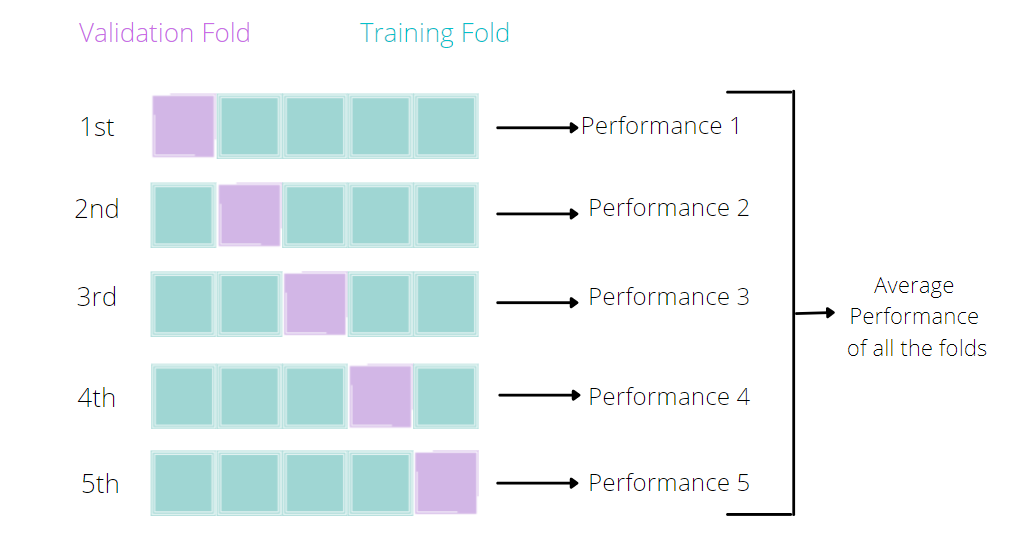

<p style="line-height:1.75;font-size:16px">
K-fold cross validation is probably the most commonly used method. The k stands for the number of folds (or subsets) we want to split our data into.<br>
The process looks something like this:<br>
<span style="line-height:1.75;font-size:16px">1. Split our data into $k$ subsets.<br>
<span style="line-height:1.75;font-size:16px">2. For each subset:<br>
<span style="line-height:1.75;font-size:16px">&nbsp;&nbsp;&nbsp;&nbsp;2.1. Train the model using the remaining $k-1$ subsets.<br>
<span style="line-height:1.75;font-size:16px">&nbsp;&nbsp;&nbsp;&nbsp;2.2. Evaluate the model using the current subset.<br>
<span style="line-height:1.75;font-size:16px">3. Report the performance across all of the subsets.<br>
Once we have the results for all of the splits we can simply calculate their mean in order to get one number which represents our model's performance.

## 3. Using K-Fold Cross Validation

<p style="line-height:1.75;font-size:16px">
Let's use the weight prediction example from the previous chapter to demonstrate how to use k-fold cross validation.

In [12]:
import pandas as pd

data = pd.read_csv('data/weight-height.csv')
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [13]:
inch_to_cm = 2.54
pound_to_kg = 0.453592

data['Height'] *= inch_to_cm
data['Weight'] *= pound_to_kg

data.head()

,Gender,Height,Weight
0,Male,187.571423,109.720985
1,Male,174.706036,73.622732
2,Male,188.239668,96.497550
3,Male,182.196685,99.809504
4,Male,177.499761,93.598619


<p style="line-height:1.75;font-size:16px">
Although we're using cross validation, we're still going to split our dataset into train and test. We do this because although CV helps us get better performance estimations during the training process, we still need to evaluate the final model against data it hasn't seen before.

In [14]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, train_size=0.8)

<p style="line-height:1.75;font-size:16px">
As is usually the case, we don't need to implement cross validation on our own, we can simply use `sklearn`'s implementation by calling `cross_val_score` and `cross_val_predict`. 

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict

k = 10
clf = LinearRegression()
predictions = cross_val_predict(clf, train[['Height']], train[['Weight']], cv=k)
scores = cross_val_score(clf, train[['Height']], train[['Weight']], cv=k)

In [28]:
scores

array([0.86180192, 0.84478952, 0.85748851, 0.85753171, 0.84598591,
       0.84765806, 0.8623505 , 0.85454185, 0.86846995, 0.86815275])

In [29]:
predictions[:20]

array([[72.48808663],
       [88.6193667 ],
       [93.60965868],
       [60.35944979],
       [66.62700977],
       [79.77895226],
       [66.09655905],
       [70.79765205],
       [97.55541025],
       [65.20680073],
       [57.18395851],
       [62.10439006],
       [79.50577109],
       [65.05409543],
       [84.83592102],
       [78.63723641],
       [59.14238869],
       [69.95649382],
       [55.89681356],
       [67.9688959 ]])

<div style="line-height:1.75;background:#1e7b1e;padding-left:20px;padding-top:5px;padding-bottom:5px;border-radius:5px 5px 0px 0px">
<i class="fa fa-pencil" style="font-size:40px;color:#c1f0c1;"></i>
</div>
<div>
<p style="line-height:1.75;font-size:16px;background:#c1f0c1;padding:20px;border-radius:0px 0px 5px 5px">
    Using cross validation, train a <code>DecisionTreeRegressor</code> on the weights dataset and include the gender as a feature as well. Experiment with different values of $k$ and model parameters (max_depth, max_leaf_nodes,...) and report the mean value. Which model and $k$ value perform best?<br>
</div>

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

data = pd.read_csv('data/weight-height.csv')
inch_to_cm = 2.54
pound_to_kg = 0.453592

data['Height'] *= inch_to_cm
data['Weight'] *= pound_to_kg

train, test = train_test_split(data, train_size=0.8)


def f(k,m):
    clf = DecisionTreeRegressor(max_depth=m, max_leaf_nodes=22)
    predictions = cross_val_predict(clf, train[['Height']], train[['Weight']], cv=k)
    scores = cross_val_score(clf, train[['Height']], train[['Weight']], cv=k)
    print(f'scores', scores)

interact(f, k=widgets.IntSlider(min=4, max=20, step=1, value=10), m=widgets.IntSlider(min=4, max=6, step=1, value=4));


interactive(children=(IntSlider(value=10, description='k', max=20, min=4), Output()), _dom_classes=('widget-in…

### Answer

In [37]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

data = pd.read_csv('data/weight-height.csv')
data = pd.get_dummies(data)
k_values = [2, 3, 5, 10, 20]
max_depth_values = [3, 5, 8, 11, 15]
max_leaf_nodes_values = [10, 20, 50, 100]

for k in k_values:
    for max_depth in max_depth_values:
        for max_leaf_nodes in max_leaf_nodes_values:
            clf = DecisionTreeRegressor(max_depth=max_depth, max_leaf_nodes=max_leaf_nodes)
            score = cross_val_score(clf, data.drop('Weight', axis=1), data['Weight'], cv=k)
            print(f'k: {k}, max depth: {max_depth}, max leaf nodes: {max_leaf_nodes}, score: {score.mean()}')
            

k: 2, max depth: 3, max leaf nodes: 10, score: -0.8896531802424508
k: 2, max depth: 3, max leaf nodes: 20, score: -0.8896531802424508
k: 2, max depth: 3, max leaf nodes: 50, score: -0.8896531802424508
k: 2, max depth: 3, max leaf nodes: 100, score: -0.8896531802424508
k: 2, max depth: 5, max leaf nodes: 10, score: -0.8713758985638445
k: 2, max depth: 5, max leaf nodes: 20, score: -0.45858344432502707
k: 2, max depth: 5, max leaf nodes: 50, score: -0.46626560625231794
k: 2, max depth: 5, max leaf nodes: 100, score: -0.46626560625231794
k: 2, max depth: 8, max leaf nodes: 10, score: -0.8713758985638445
k: 2, max depth: 8, max leaf nodes: 20, score: -0.45858344432502707
k: 2, max depth: 8, max leaf nodes: 50, score: -0.4518659324741715
k: 2, max depth: 8, max leaf nodes: 100, score: -0.4611869087670952
k: 2, max depth: 11, max leaf nodes: 10, score: -0.8713758985638445
k: 2, max depth: 11, max leaf nodes: 20, score: -0.45858344432502707
k: 2, max depth: 11, max leaf nodes: 50, score: -0.4